In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit


In [2]:
# download file: 

import requests


url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls'
r = requests.get(url, allow_redirects=True)

open('COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls', 'wb').write(r.content)


url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'
r = requests.get(url, allow_redirects=True)

open('COVID-19-geographic-disbtribution-worldwide-today.xls', 'wb').write(r.content)

 

286734

# read data

In [5]:
#df = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls")
df = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-today.xls")
df

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Pop_Data.2018
0,2020-03-25,25,3,2020,2,0,Afghanistan,AF,37172386.0
1,2020-03-24,24,3,2020,6,1,Afghanistan,AF,37172386.0
2,2020-03-23,23,3,2020,10,0,Afghanistan,AF,37172386.0
3,2020-03-22,22,3,2020,0,0,Afghanistan,AF,37172386.0
4,2020-03-21,21,3,2020,2,0,Afghanistan,AF,37172386.0
...,...,...,...,...,...,...,...,...,...
6733,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,14439018.0
6734,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,14439018.0
6735,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,14439018.0
6736,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,14439018.0


# explore data

In [6]:
df.groupby("Countries and territories")["Cases"].sum()

Countries and territories
Afghanistan     42
Albania        123
Algeria        231
Andorra        164
Angola           2
              ... 
Uzbekistan      55
Venezuela       91
Vietnam        134
Zambia           3
Zimbabwe         2
Name: Cases, Length: 189, dtype: int64

In [7]:
df[df["Countries and territories"]=="United_States_of_America"]

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Pop_Data.2018
6524,2020-03-25,25,3,2020,8789,211,United_States_of_America,US,327167434.0
6525,2020-03-24,24,3,2020,11236,119,United_States_of_America,US,327167434.0
6526,2020-03-23,23,3,2020,8459,131,United_States_of_America,US,327167434.0
6527,2020-03-22,22,3,2020,7123,80,United_States_of_America,US,327167434.0
6528,2020-03-21,21,3,2020,5374,110,United_States_of_America,US,327167434.0
...,...,...,...,...,...,...,...,...,...
6605,2020-01-04,4,1,2020,0,0,United_States_of_America,US,327167434.0
6606,2020-01-03,3,1,2020,0,0,United_States_of_America,US,327167434.0
6607,2020-01-02,2,1,2020,0,0,United_States_of_America,US,327167434.0
6608,2020-01-01,1,1,2020,0,0,United_States_of_America,US,327167434.0


In [8]:
df[df["DateRep"]=="2020-03-18"].sort_values(by=['Cases'], ascending=False)[:50]

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Pop_Data.2018
3279,2020-03-18,18,3,2020,3526,347,Italy,IT,6.043128e+07
5762,2020-03-18,18,3,2020,1987,182,Spain,ES,4.672375e+07
6531,2020-03-18,18,3,2020,1766,23,United_States_of_America,US,3.271674e+08
2937,2020-03-18,18,3,2020,1178,135,Iran,IR,8.180027e+07
2395,2020-03-18,18,3,2020,1144,0,Germany,DE,8.292792e+07
2199,2020-03-18,18,3,2020,1097,27,France,FR,6.698724e+07
6029,2020-03-18,18,3,2020,450,5,Switzerland,CH,8.516543e+06
6436,2020-03-18,18,3,2020,407,5,United_Kingdom,UK,6.648899e+07
385,2020-03-18,18,3,2020,316,0,Austria,AT,8.847037e+06
4325,2020-03-18,18,3,2020,292,0,Netherlands,NL,1.723102e+07


# visual explore

In [9]:
# logistic function
from scipy.stats import logistic

def logistic_dNdt(t, norm, tpeak, width):
    return logistic.pdf(t, tpeak, width) * norm


# exponential 

def exp(t, norm, t0, trise):
    return norm*np.exp((t-t0)/trise)


import scipy

def chisq(y_vals, y_expected, y_errs, num_params=1):
    #returns chi2, dof, red_chi2
    #  for reduced chisq test, under the assumption of Poisson counting
    #  we have lnL = const - (1/2.)*chi2
    if y_vals.shape[0] != y_expected.shape[0]:
        print("Inconsistent input sizes")
        return
    #z = (y_vals[i] - y_expected[i]) / y_errs[i]    
    z = (y_vals - y_expected) / y_errs
    chi2 = np.sum(z ** 2)
    chi2dof = chi2 / (y_vals.shape[0] - num_params)
    return chi2, (y_vals.shape[0] - num_params), chi2dof


def fit_factory_boundMC(model, x, y, dy=None, p0=[1.2e-11, -3.6], Nsim=500, plotEs=None):
    if dy is not None:
        paramsPLlog, covariacesPLlog = curve_fit(model, x,
                                           y, p0=p0,
                                           sigma=dy, 
                                             absolute_sigma=True) #approx abs
    else:
        paramsPLlog, covariacesPLlog = curve_fit(model, x,
                                           y, p0=p0)
        
    for i in range(len(p0)):
        print("best-fit param %d = %.4g +/- %.4g" % (i, paramsPLlog[i], np.sqrt(abs(covariacesPLlog[i,i]))))

    
    # Use some MC
    #print(type(x), x)
    #print(float(x[0]), float(x[-1]))
    if plotEs is not None: 
        x_values = plotEs
    else:
        x_values = np.logspace(np.log10(float(x[0])), np.log10(float(x[-1])), 100)
    rng = np.random.RandomState(seed=76)
    parameter_samples = rng.multivariate_normal(paramsPLlog, covariacesPLlog, Nsim)
    #print(paramsPLlog, covariacesPLlog)
    
    #print(parameter_samples.shape)
    realizations = np.array([model(x_values, *pars) for pars in parameter_samples])

    qlo = 100 * scipy.stats.norm.cdf(-1)    #1 is the 1 sigma
    y_low = np.percentile(realizations, qlo, axis=0)
    qhi = 100 * scipy.stats.norm.cdf(1)     #1 is the 1 sigma
    y_high = np.percentile(realizations, qhi, axis=0)
    
    #print(y_low.shape)
    
    return paramsPLlog, np.diag(covariacesPLlog)**0.5, x_values, y_low, y_high





In [10]:
df["DateRep"].min()

Timestamp('2019-12-31 00:00:00')

Text(0, 0.5, 'Daily New Cases')

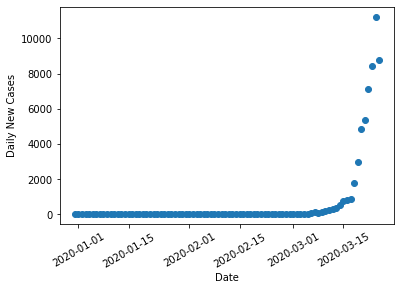

In [14]:
dfus = df[df["Countries and territories"]=="United_States_of_America"]

fig, ax = plt.subplots()

#plot
plt.plot(dfus["DateRep"], dfus["Cases"], marker="o", ls="")


#set tick labels
plt.xticks(rotation=30)

#set axis labels
plt.xlabel("Date")
plt.ylabel("Daily New Cases")


In [15]:
dfus

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Pop_Data.2018
6524,2020-03-25,25,3,2020,8789,211,United_States_of_America,US,327167434.0
6525,2020-03-24,24,3,2020,11236,119,United_States_of_America,US,327167434.0
6526,2020-03-23,23,3,2020,8459,131,United_States_of_America,US,327167434.0
6527,2020-03-22,22,3,2020,7123,80,United_States_of_America,US,327167434.0
6528,2020-03-21,21,3,2020,5374,110,United_States_of_America,US,327167434.0
...,...,...,...,...,...,...,...,...,...
6605,2020-01-04,4,1,2020,0,0,United_States_of_America,US,327167434.0
6606,2020-01-03,3,1,2020,0,0,United_States_of_America,US,327167434.0
6607,2020-01-02,2,1,2020,0,0,United_States_of_America,US,327167434.0
6608,2020-01-01,1,1,2020,0,0,United_States_of_America,US,327167434.0


In [16]:
dfus["DateRep"]-t0

NameError: name 't0' is not defined

In [17]:
# experiment turning dates to relative changes in unit of day; note it's inverted
t0 = df["DateRep"].min()

(dfus["DateRep"]-t0)/ np.timedelta64(1, 'D')

6524    85.0
6525    84.0
6526    83.0
6527    82.0
6528    81.0
        ... 
6605     4.0
6606     3.0
6607     2.0
6608     1.0
6609     0.0
Name: DateRep, Length: 86, dtype: float64

best-fit param 0 = 2704 +/- 1.634e+10
best-fit param 1 = 78.27 +/- 2.821e+07
best-fit param 2 = 4.672 +/- 0.2327


/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: covariance is not positive-semidefinite.
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


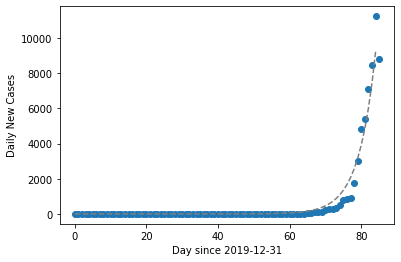

In [23]:
fig, ax = plt.subplots()

#plot
t0 = df["DateRep"].min()
plt.plot((dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), dfus["Cases"], marker="o", ls="")

#fit; US is still in early exponential phase

plot_ts = np.arange(0,85,1.0)
#ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(logistic_dNdt, 
#                                                (dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), 
#                                                 dfus["Cases"].values,  
#                                                       p0=[2000, 85, 5], 
#                                                        plotEs=plot_ts)

ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(exp, 
                                                 (dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), 
                                                 dfus["Cases"].values,  
                                                 p0=[5000, 80, 3], 
                                                 plotEs=plot_ts)

model_ = exp(plot_ts, *ps_) 
plt.plot(plot_ts, model_, color="gray", ls='--')
plt.fill_between(ts_,ylo_, yhi_,alpha=0.3,color="gray")


#set tick labels
#plt.xticks(rotation=30)

#set axis labels
plt.xlabel("Day since 2019-12-31")
plt.ylabel("Daily New Cases")

#save plot
plt.savefig("US_COVID_Mar18.png")


best-fit param 0 = 7898 +/- 1.862e+10
best-fit param 1 = 83.28 +/- 1.102e+07
best-fit param 2 = 4.672 +/- 0.2277


/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: covariance is not positive-semidefinite.
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, 'Daily New Cases')

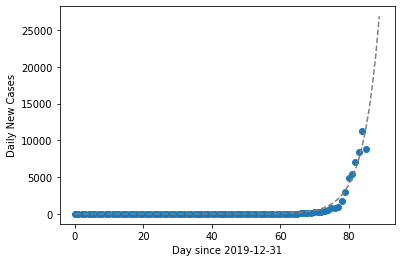

In [54]:
fig, ax = plt.subplots()

#plot
t0 = df["DateRep"].min()
plt.plot((dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), dfus["Cases"], marker="o", ls="")

#fit; US is still in early exponential phase

plot_ts = np.arange(0,90,1.0)
#ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(logistic_dNdt, 
#                                                (dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), 
#                                                 dfus["Cases"].values,  
#                                                       p0=[2000, 85, 5], 
#                                                        plotEs=plot_ts)

ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(exp, 
                                                 (dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), 
                                                 dfus["Cases"].values,  
                                                 p0=[3000, 80, 3], 
                                                 plotEs=plot_ts)

model_ = exp(plot_ts, *ps_) 
plt.plot(plot_ts, model_, color="gray", ls='--')
plt.fill_between(ts_,ylo_, yhi_,alpha=0.3,color="gray")


#set tick labels
#plt.xticks(rotation=30)

#set axis labels
plt.xlabel("Day since 2019-12-31")
plt.ylabel("Daily New Cases")

#plt.yscale('log')
#save plot
#plt.savefig("US_COVID_Mar18.png")


best-fit param 0 = 7898 +/- 1.862e+10
best-fit param 1 = 83.28 +/- 1.102e+07
best-fit param 2 = 4.672 +/- 0.2277


/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: covariance is not positive-semidefinite.
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


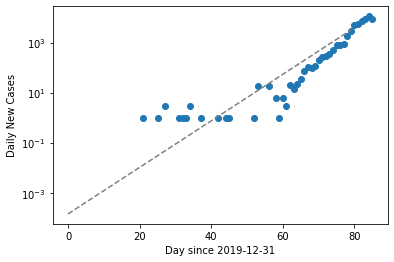

In [52]:
fig, ax = plt.subplots()

#plot
t0 = df["DateRep"].min()
plt.plot((dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), dfus["Cases"], marker="o", ls="")

#fit; US is still in early exponential phase

plot_ts = np.arange(0,80,1.0)
#ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(logistic_dNdt, 
#                                                (dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), 
#                                                 dfus["Cases"].values,  
#                                                       p0=[2000, 85, 5], 
#                                                        plotEs=plot_ts)

ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(exp, 
                                                 (dfus["DateRep"]-t0)/ np.timedelta64(1, 'D'), 
                                                 dfus["Cases"].values,  
                                                 p0=[3000, 80, 3], 
                                                 plotEs=plot_ts)

model_ = exp(plot_ts, *ps_) 
plt.plot(plot_ts, model_, color="gray", ls='--')
plt.fill_between(ts_,ylo_, yhi_,alpha=0.3,color="gray")


#set tick labels
#plt.xticks(rotation=30)

#set axis labels
plt.xlabel("Day since 2019-12-31")
plt.ylabel("Daily New Cases")

#
plt.yscale('log')

#save plot
plt.savefig("US_COVID_Mar25_semilog.png")


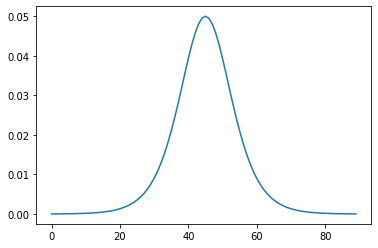

In [26]:
# logistic funciton pdf example
plot_ts = np.arange(0,90,1.0)
plt.plot(plot_ts, logistic.pdf(plot_ts, 45, 5))

best-fit param 0 = 8.181e+04 +/- 8790
best-fit param 1 = 41.27 +/- 0.8604
best-fit param 2 = 4.548 +/- 0.6024


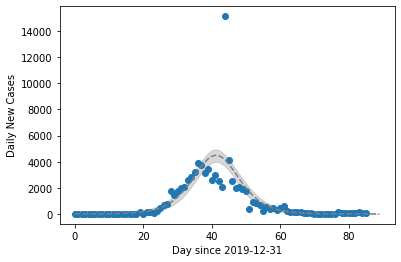

In [27]:
dfch = df[df["Countries and territories"]=="China"]

t0ch = dfch["DateRep"].min()

ts_rel_ch = ((dfch["DateRep"]-t0ch)/ np.timedelta64(1, 'D')).values[::-1]

plt.plot(ts_rel_ch, dfch["Cases"].values[::-1], marker="o", ls="")

#fit
plot_ts = np.arange(0,90,1.0)
ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(logistic_dNdt, 
                                                      ts_rel_ch, 
                                                       dfch["Cases"].values[::-1],  
                                                       p0=[4000, 35, 5], 
                                                        plotEs=plot_ts)
model_ = logistic_dNdt(plot_ts, *ps_) 
plt.plot(plot_ts, model_, color="gray", ls='--')
plt.fill_between(ts_,ylo_, yhi_,alpha=0.3,color="gray")


#set axis labels
plt.xlabel("Day since 2019-12-31")
plt.ylabel("Daily New Cases")

#save plot
plt.savefig("China_COVID_Mar18.png")


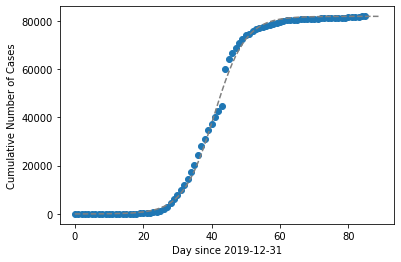

In [28]:
cumch = np.cumsum(dfch["Cases"].values[::-1])
plt.plot(ts_rel_ch, cumch, marker="o", ls="")
plt.plot(plot_ts, np.cumsum(model_), color="gray", ls='--')

#set axis labels
plt.xlabel("Day since 2019-12-31")
plt.ylabel("Cumulative Number of Cases")

#save plot
plt.savefig("China_COVID_Mar18_cum.png")



In [29]:
# home work
# look at Italy and South Korea

In [71]:
def check_country(country="China", model=logistic_dNdt, p0=[4000, 35, 5], 
                  blind=0, out_string="COVID_Mar25_cum", ylog=False):
    dfch = df[df["Countries and territories"]==country]

    t0ch = dfch["DateRep"].min()

    ts_rel_ch = ((dfch["DateRep"]-t0ch)/ np.timedelta64(1, 'D')).values[::-1]
    nums = dfch["Cases"].values[::-1]
    plot_ts = np.arange(0,np.max(ts_rel_ch)+10, 1.0)
    
    if blind > 0: 
        print("Blinding the last {} days".format(blind))
        ts_blind = ts_rel_ch[-blind:]
        nums_blind = nums[-blind:]
        ts_rel_ch = ts_rel_ch[:-blind]
        nums = nums[:-blind]
        print(ts_blind, nums_blind)
        plt.plot(ts_blind, nums_blind, marker="o", ls="", color='r')        

    plt.plot(ts_rel_ch, nums, marker="o", ls="")

    #fit
    ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(model, 
                                                          ts_rel_ch, 
                                                           nums,  
                                                           p0=p0, 
                                                            plotEs=plot_ts)
    model_ = model(plot_ts, *ps_) 
    plt.plot(plot_ts, model_, color="gray", ls='--')
    plt.fill_between(ts_,ylo_, yhi_,alpha=0.3,color="gray")
    


    if ylog:
        plt.yscale('log')
    #set axis labels
    plt.xlabel("Day since 2019-12-31")
    plt.ylabel("Daily New Cases")

    plt.tight_layout()
    #save plot
    plt.savefig("{}_COVID_Mar18.png".format(country))
    
    #
    plt.figure()
    cumch = np.cumsum(nums)
    plt.plot(ts_rel_ch, cumch, marker="o", ls="")
    plt.plot(plot_ts, np.cumsum(model_), color="gray", ls='--')
    if blind > 0: 
        cum_blind = np.max(cumch)+np.cumsum(nums_blind)
        plt.plot(ts_blind, cum_blind, marker="o", ls="", color='r')

    

    #set axis labels
    plt.xlabel("Day since 2019-12-31")
    plt.ylabel("Cumulative Number of Cases")
    newtotali = max(cumch)
    
    if ylog:
        plt.yscale('log')
    plt.tight_layout()
    
    for i in range(5):
        ti = np.max(ts_rel_ch)+i+1
        newi = model(ti, *ps_)
        newtotali += newi
        print("day {} from today, expect {} new cases and {} total cases".format(
        i+1,newi, newtotali ))

    #save plot
    plt.savefig("{}_{}.png".format(country, out_string))




In [24]:
df["Countries and territories"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia_and_Herzegovina', 'Brazil', 'Brunei_Darussalam',
       'Bulgaria', 'Burkina_Faso', 'Cambodia', 'Cameroon', 'CANADA',
       'Canada', 'Cases_on_an_international_conveyance_Japan',
       'Central_African_Republic', 'Chile', 'China', 'Colombia', 'Congo',
       'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czech_Republic', 'Democratic_Republic_of_the_Congo', 'Denmark',
       'Dominican_Republic', 'Ecuador', 'Egypt', 'Equatorial_Guinea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Holy_See', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 

best-fit param 0 = 8.181e+04 +/- 8790
best-fit param 1 = 41.27 +/- 0.8604
best-fit param 2 = 4.548 +/- 0.6024
day 1 from today, expect 0.9627330978825628 new cases and 81847.96273309788 total cases
day 2 from today, expect 0.7727337375493025 new cases and 81848.73546683544 total cases
day 3 from today, expect 0.6202289507694418 new cases and 81849.3556957862 total cases
day 4 from today, expect 0.49782045889308507 new cases and 81849.8535162451 total cases
day 5 from today, expect 0.39956945449738945 new cases and 81850.2530856996 total cases


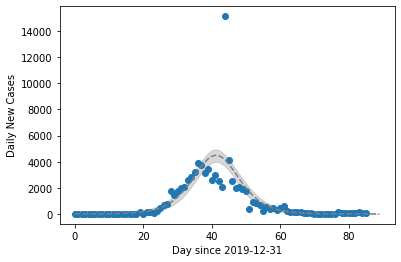

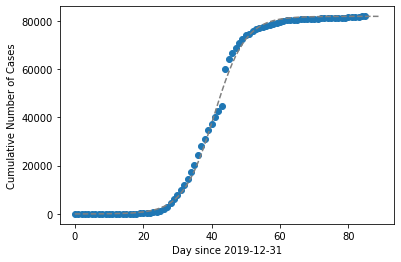

In [47]:
check_country(country="China", model=logistic_dNdt, p0=[4000, 35, 5])

best-fit param 0 = 8480 +/- 340.1
best-fit param 1 = 62.4 +/- 0.2298
best-fit param 2 = 3.254 +/- 0.1609
day 1 from today, expect 1.8448911830950327 new cases and 9138.844891183095 total cases
day 2 from today, expect 1.357270292277687 new cases and 9140.202161475372 total cases
day 3 from today, expect 0.998432868044902 new cases and 9141.200594343418 total cases
day 4 from today, expect 0.7344119212007103 new cases and 9141.935006264619 total cases
day 5 from today, expect 0.5401784636800067 new cases and 9142.475184728299 total cases


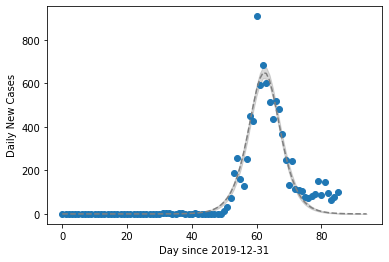

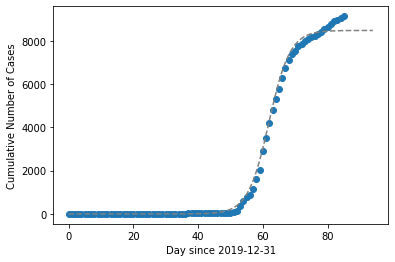

In [67]:
check_country(country="South_Korea", model=logistic_dNdt, p0=[4000, 35, 5])

Blinding the last 10 days
[76. 77. 78. 79. 80. 81. 82. 83. 84. 85.] [ 74  84  93 152  87 147  98  64  76 100]
best-fit param 0 = 8317 +/- 307.7
best-fit param 1 = 62.34 +/- 0.2037
best-fit param 2 = 3.147 +/- 0.1444
day 1 from today, expect 33.533352920611414 new cases and 8195.533352920611 total cases
day 2 from today, expect 24.576022578494957 new cases and 8220.109375499105 total cases
day 3 from today, expect 17.977285905763953 new cases and 8238.08666140487 total cases
day 4 from today, expect 13.132131439491955 new cases and 8251.218792844362 total cases
day 5 from today, expect 9.583120262131107 new cases and 8260.801913106492 total cases


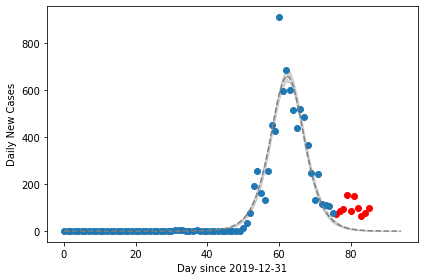

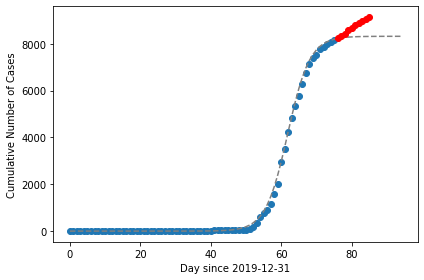

In [72]:
check_country(country="South_Korea", model=logistic_dNdt, p0=[4000, 35, 5], blind=10, out_string="Mar25_blind10days")

best-fit param 0 = 1.068e+05 +/- 9798
best-fit param 1 = 82.73 +/- 0.7627
best-fit param 2 = 4.765 +/- 0.416
day 1 from today, expect 4994.003675763512 new cases and 74170.00367576351 total cases
day 2 from today, expect 4615.0549537566685 new cases and 78785.05862952018 total cases
day 3 from today, expect 4188.2892576796285 new cases and 82973.34788719981 total cases
day 4 from today, expect 3738.9774206504367 new cases and 86712.32530785025 total cases
day 5 from today, expect 3289.189892694607 new cases and 90001.51520054485 total cases


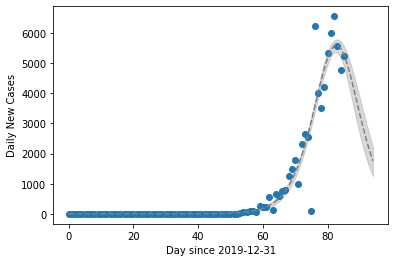

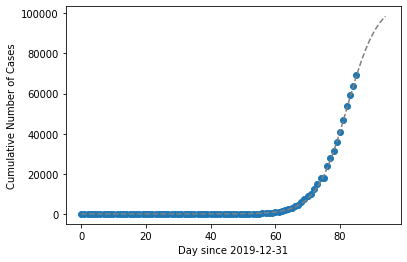

In [69]:
check_country(country="Italy", model=logistic_dNdt, p0=[4000, 35, 5])

Blinding the last 5 days
[81. 82. 83. 84. 85.] [5986 6557 5560 4789 5249]
best-fit param 0 = 1.354e+05 +/- 7.442e+04
best-fit param 1 = 85 +/- 5.015
best-fit param 2 = 5.546 +/- 1.091
day 1 from today, expect 5373.619096702694 new cases and 46408.61909670269 total cases
day 2 from today, expect 5677.712522112945 new cases and 52086.33161881564 total cases
day 3 from today, expect 5909.074595181464 new cases and 57995.40621399711 total cases
day 4 from today, expect 6053.949772622927 new cases and 64049.35598662004 total cases
day 5 from today, expect 6103.300038849948 new cases and 70152.65602546999 total cases


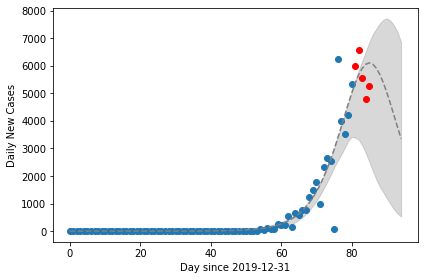

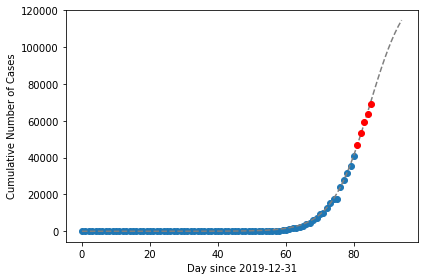

In [74]:
check_country(country="Italy", model=logistic_dNdt, p0=[4000, 35, 5], blind=5, out_string="Mar25_blind5days")

Blinding the last 5 days
[81. 82. 83. 84. 85.] [5986 6557 5560 4789 5249]
best-fit param 0 = 1.354e+05 +/- 7.442e+04
best-fit param 1 = 85 +/- 5.015
best-fit param 2 = 5.546 +/- 1.091
day 1 from today, expect 5373.619096702694 new cases and 46408.61909670269 total cases
day 2 from today, expect 5677.712522112945 new cases and 52086.33161881564 total cases
day 3 from today, expect 5909.074595181464 new cases and 57995.40621399711 total cases
day 4 from today, expect 6053.949772622927 new cases and 64049.35598662004 total cases
day 5 from today, expect 6103.300038849948 new cases and 70152.65602546999 total cases


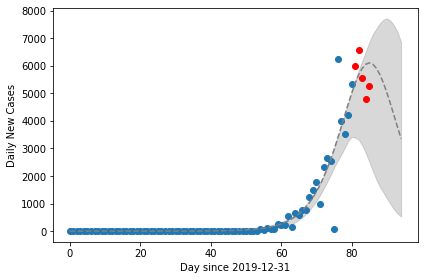

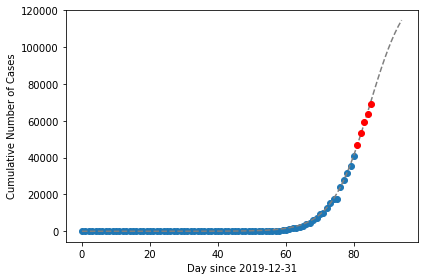

In [75]:
check_country(country="Italy", model=logistic_dNdt, p0=[4000, 35, 5], blind=5, out_string="Mar25_blind3days")

best-fit param 0 = 13.39 +/- 3.785e+07
best-fit param 1 = 53.47 +/- 1.33e+07
best-fit param 2 = 4.672 +/- 0.2298
day 1 from today, expect 14139.74583566204 new cases and 69370.74583566203 total cases
day 2 from today, expect 17514.353812234887 new cases and 86885.09964789692 total cases
day 3 from today, expect 21694.34960326385 new cases and 108579.44925116077 total cases
day 4 from today, expect 26871.94798930347 new cases and 135451.39724046423 total cases
day 5 from today, expect 33285.23795113879 new cases and 168736.635191603 total cases


/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: covariance is not positive-semidefinite.
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


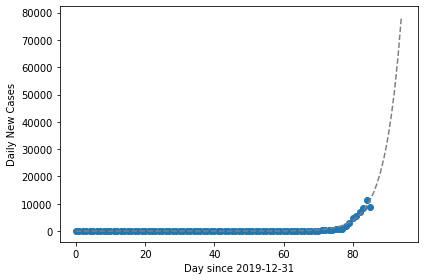

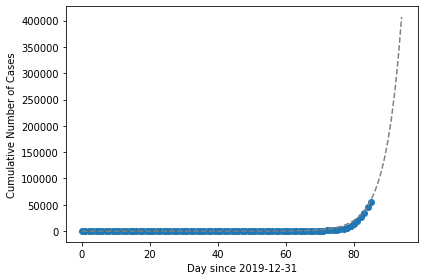

In [76]:
check_country(country="United_States_of_America", model=exp, p0=[400, 50, 5])

/home/qifeng/miniconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4221: RuntimeWarning: overflow encountered in exp
  return -x - 2. * sc.log1p(np.exp(-x))


best-fit param 0 = 8.353e+04 +/- 2979
best-fit param 1 = 84.25 +/- 0.1325
best-fit param 2 = 2.127 +/- 0.07212
day 1 from today, expect 8320.022369373952 new cases and 63551.02236937395 total cases
day 2 from today, expect 6627.907278355663 new cases and 70178.92964772962 total cases
day 3 from today, expect 4900.500306884894 new cases and 75079.4299546145 total cases
day 4 from today, expect 3428.0090929419075 new cases and 78507.43904755641 total cases
day 5 from today, expect 2306.4364421920486 new cases and 80813.87548974846 total cases


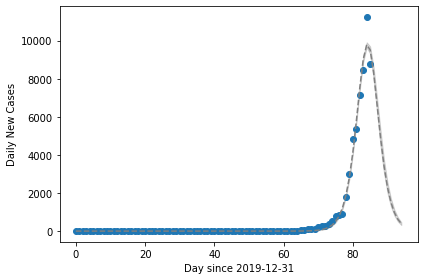

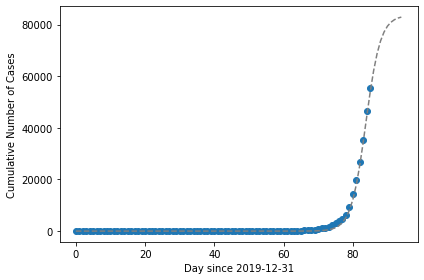

In [77]:
check_country(country="United_States_of_America", model=logistic_dNdt, p0=[4000, 35, 5])

Blinding the last 3 days
[83. 84. 85.] [ 8459 11236  8789]
best-fit param 0 = 6.534e+04 +/- 5899
best-fit param 1 = 83.41 +/- 0.3215
best-fit param 2 = 2.068 +/- 0.08812
day 1 from today, expect 7825.424808585773 new cases and 34572.42480858577 total cases
day 2 from today, expect 7739.681605662174 new cases and 42312.106414247944 total cases
day 3 from today, expect 6833.284879540167 new cases and 49145.39129378811 total cases
day 4 from today, expect 5455.808916911169 new cases and 54601.20021069928 total cases
day 5 from today, expect 4018.2921253032723 new cases and 58619.49233600255 total cases


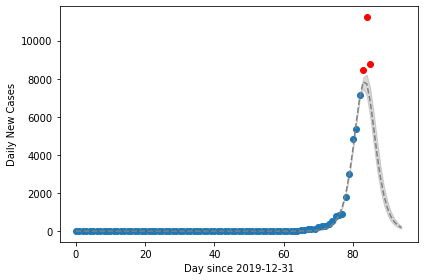

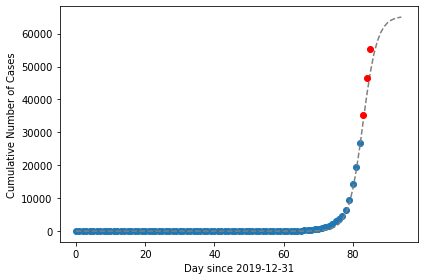

In [92]:
check_country(country="United_States_of_America", model=logistic_dNdt, p0=[20000, 90, 10], blind=3, out_string="Mar25_blind3days")

Blinding the last 5 days
[81. 82. 83. 84. 85.] [ 5374  7123  8459 11236  8789]
best-fit param 0 = 930.1 +/- 8.093e+08
best-fit param 1 = 76.4 +/- 1.924e+06
best-fit param 2 = 2.212 +/- 0.05312
day 1 from today, expect 7446.761517872583 new cases and 21696.761517872583 total cases
day 2 from today, expect 11704.350499253414 new cases and 33401.112017126 total cases
day 3 from today, expect 18396.16057001245 new cases and 51797.27258713845 total cases
day 4 from today, expect 28913.925957640073 new cases and 80711.19854477851 total cases
day 5 from today, expect 45445.08682135983 new cases and 126156.28536613834 total cases


/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: covariance is not positive-semidefinite.
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


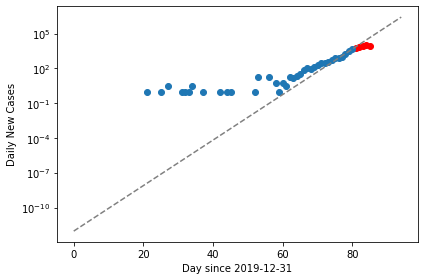

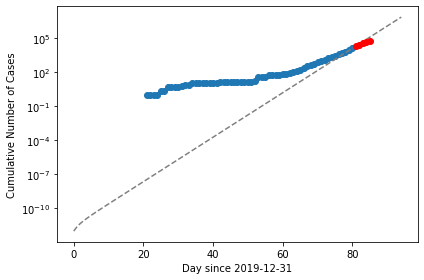

In [91]:
check_country(country="United_States_of_America", 
              model=exp, p0=[1000, 78, 6],
              #model=logistic_dNdt, p0=[3000, 80, 5], 
              blind=5, out_string="Mar25_blind5days_expmodel", ylog=True)

In [81]:
import geopandas as gpd
